In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [5]:
df = pd.read_csv('D:/University/EEG_paper/Dataset/3_Sleepy_driver/acquiredDataset.csv')


In [8]:
missing_values = df.isnull().sum()
stats_summary = df.describe()


print("Missing Values:\n", missing_values)
print("Statistics Summary:\n", stats_summary)

Missing Values:
 attention         0
meditation        0
delta             0
theta             0
lowAlpha          0
highAlpha         0
lowBeta           0
highBeta          0
lowGamma          0
highGamma         0
classification    0
dtype: int64
Statistics Summary:
          attention   meditation         delta         theta       lowAlpha  \
count  3735.000000  3735.000000  3.735000e+03  3.735000e+03    3735.000000   
mean     48.214726    56.577510  5.187714e+05  1.362420e+05   33413.343775   
std      21.876949    19.066577  5.997837e+05  2.175501e+05   51970.930842   
min       1.000000     1.000000  2.160000e+02  1.380000e+02      32.000000   
25%      35.000000    43.000000  7.199650e+04  2.347200e+04    7402.000000   
50%      48.000000    56.000000  2.773820e+05  5.797200e+04   16481.000000   
75%      63.000000    69.000000  7.780680e+05  1.514855e+05   37721.500000   
max     100.000000   100.000000  3.598743e+06  3.194358e+06  699008.000000   

           highAlpha      

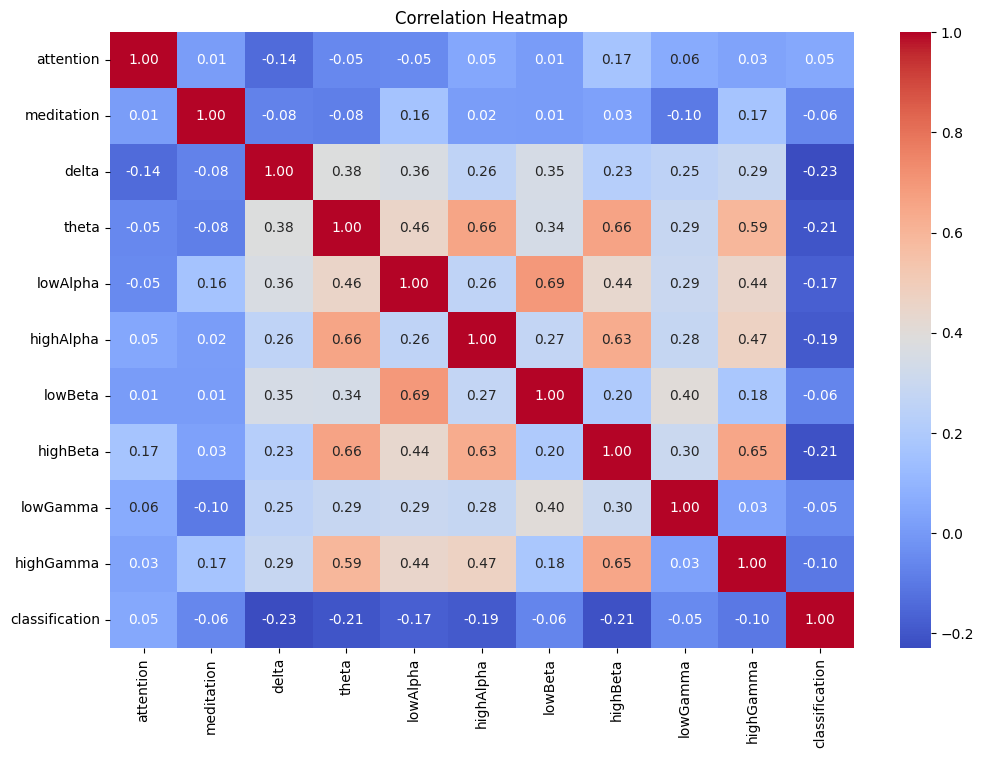

In [9]:
#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


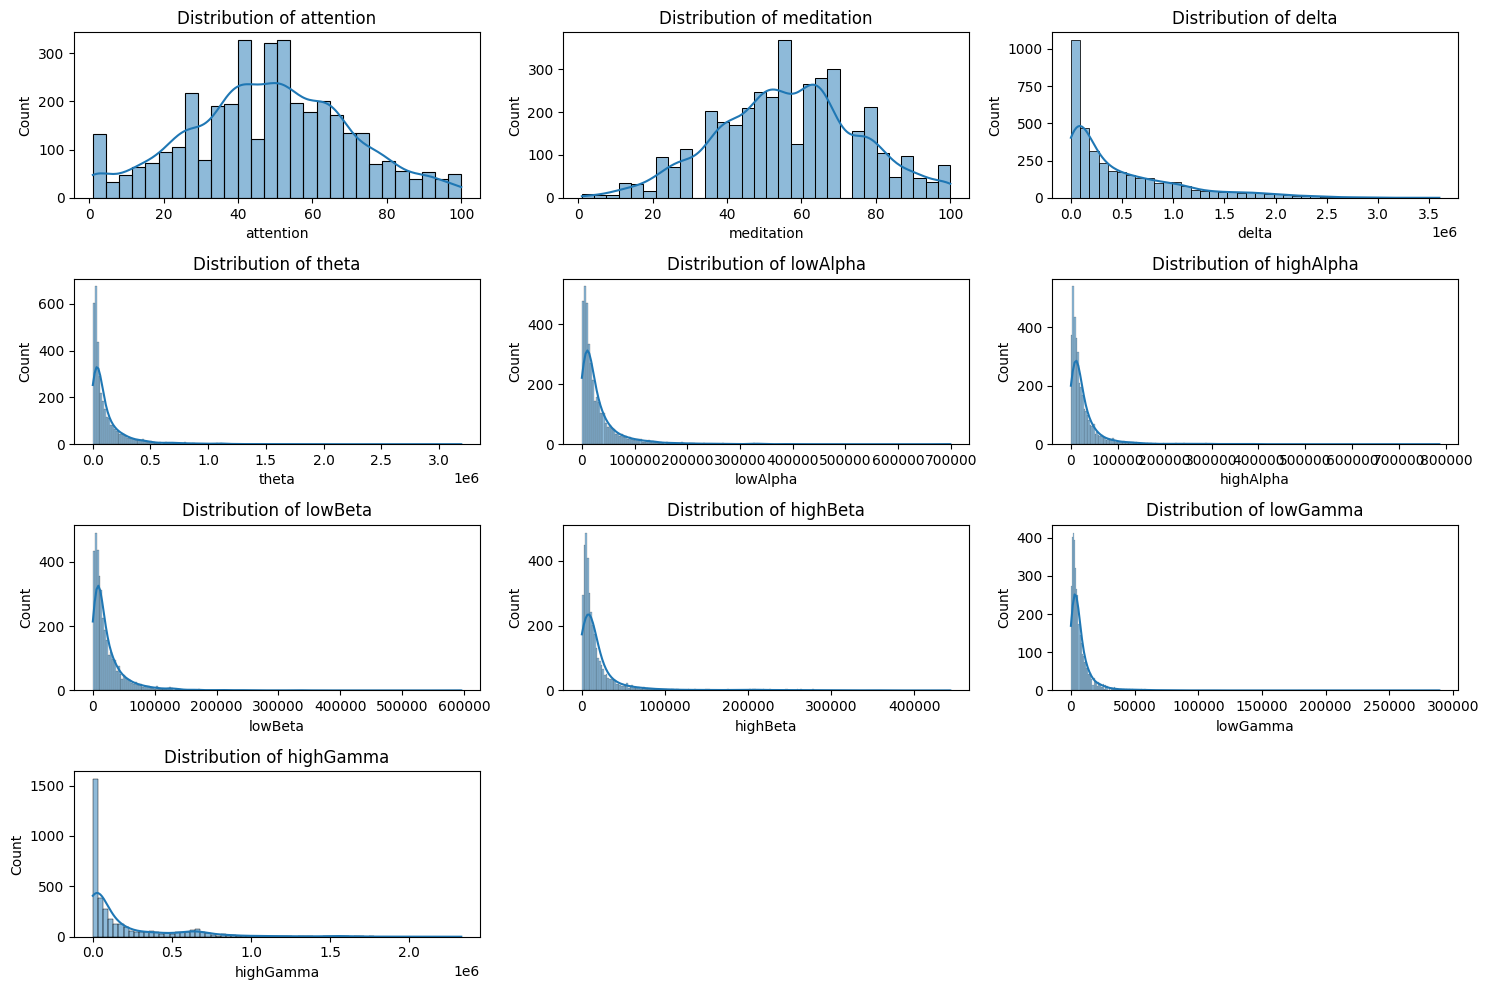

In [10]:
#distribution plot
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1], 1):  # Excluding the classification column
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


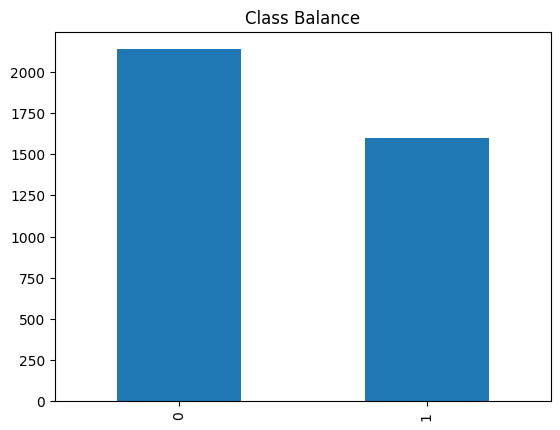

In [11]:
class_balance = df['classification'].value_counts().plot(kind='bar', title="Class Balance")


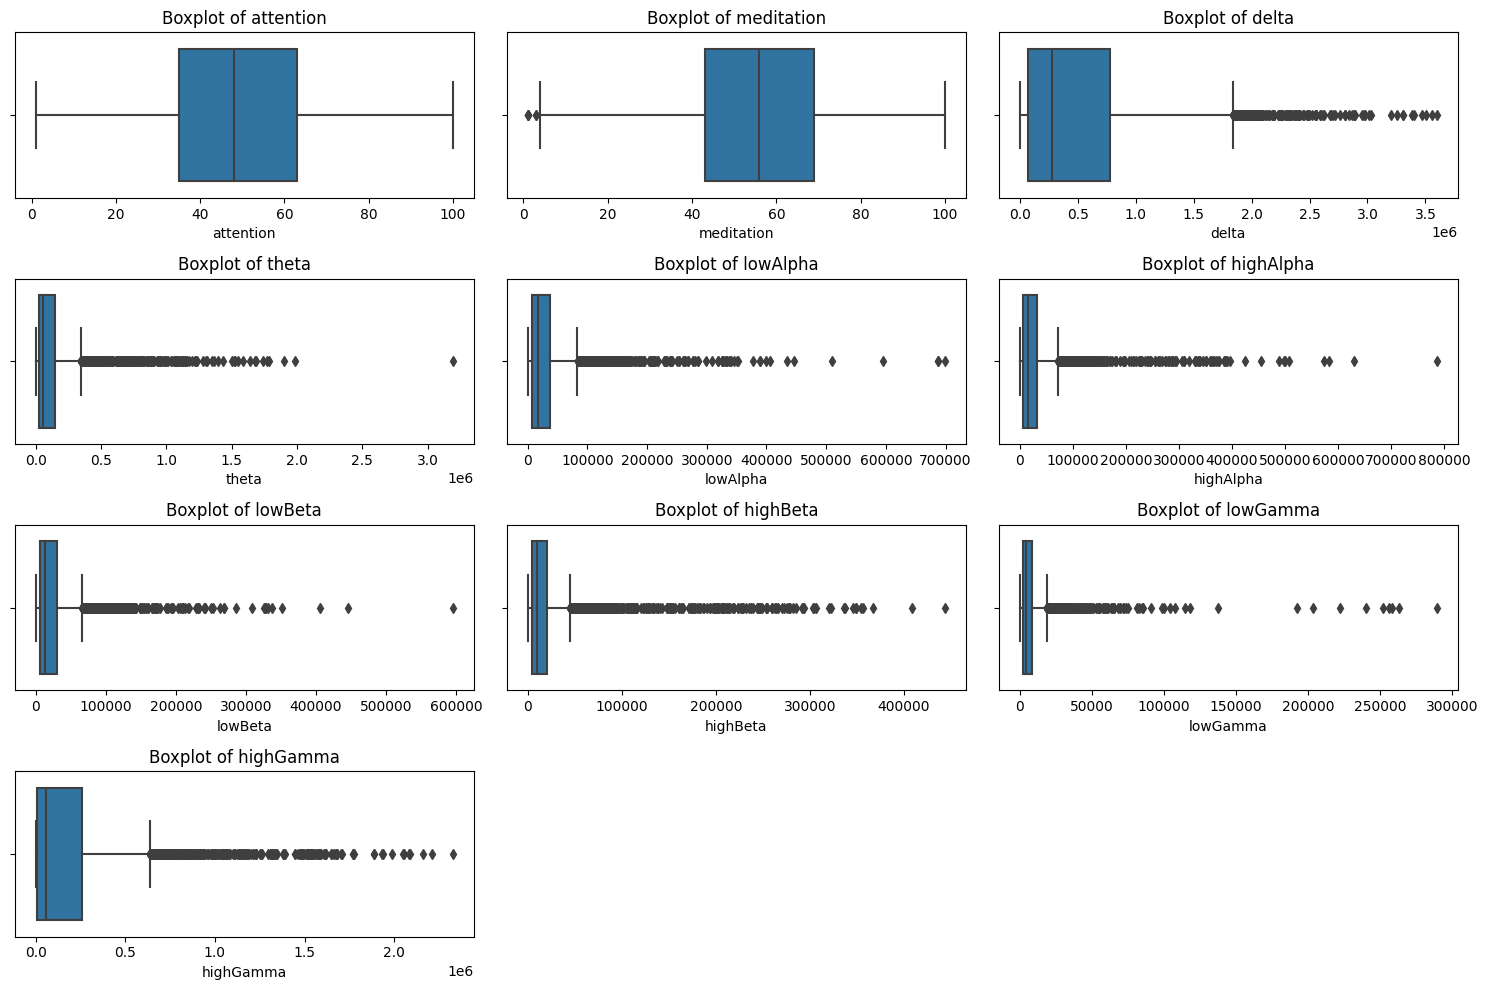

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1], 1):  
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [17]:
df = pd.read_csv('D:/University/EEG_paper/Dataset/3_Sleepy_driver/acquiredDataset.csv')

X = df.drop('classification', axis=1)
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'MLP (Neural Network)': MLPClassifier(max_iter=1000),
    'LDA': LDA()
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy


In [19]:
print("Accuracies of the algorithms:\n", accuracies)

Accuracies of the algorithms:
 {'SVM': 0.727921498661909, 'Random Forest': 0.7832292595896521, 'KNN': 0.6966993755575379, 'Logistic Regression': 0.6895628902765388, 'Naive Bayes': 0.5691347011596789, 'MLP (Neural Network)': 0.7591436217662801, 'LDA': 0.656556645851918}


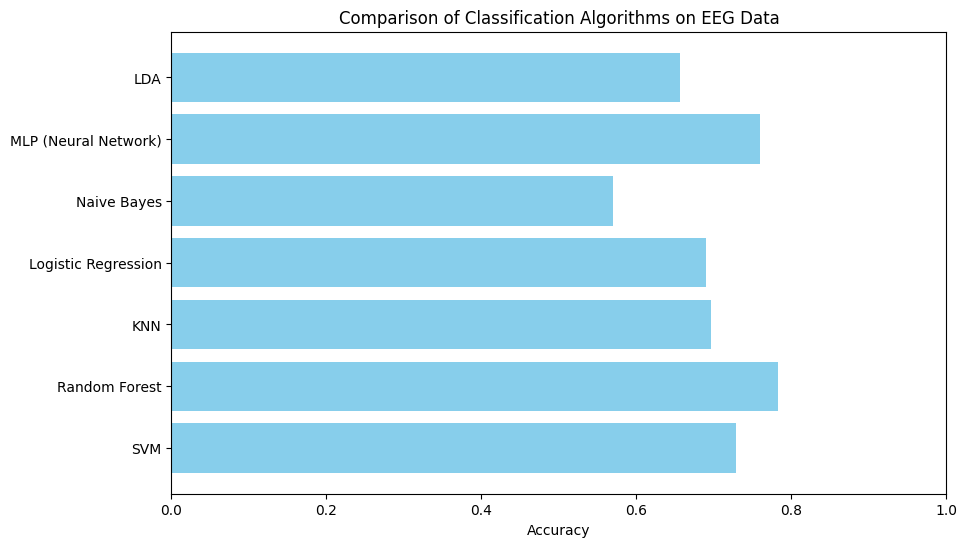

In [20]:
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Classification Algorithms on EEG Data')
plt.xlim(0, 1)
plt.show()